In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as npy

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\keegan.white\Downloads\home1.csv')

In [2]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,83252,452600,NEAR BAY
1,21,7099,1106.0,2401,1138,83014,358500,NEAR BAY
2,52,1467,190.0,496,177,72574,352100,NEAR BAY
3,52,1274,235.0,558,219,56431,341300,NEAR BAY
4,52,1627,280.0,565,259,38462,342200,NEAR BAY


In [4]:
df.sort_values(by=['median_income'], inplace=False, ascending=False)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4352,37,407,67.0,100,47,150001,500001,<1H OCEAN
10673,13,5192,658.0,1865,662,150001,500001,<1H OCEAN
8849,52,3815,439.0,1266,413,150001,500001,<1H OCEAN
4606,52,1482,171.0,531,161,150001,500001,<1H OCEAN
5257,42,2861,360.0,829,310,150001,500001,<1H OCEAN
...,...,...,...,...,...,...,...,...
3249,23,333,92.0,198,55,4999,100000,INLAND
3258,16,411,114.0,26,19,4999,73500,INLAND
6343,52,62,9.0,44,16,4999,112500,INLAND
5213,52,117,33.0,74,45,4999,90600,<1H OCEAN


In [5]:
df.sort_values(by=['median_house_value'], inplace=False, ascending=False)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10667,27,2278,316.0,772,304,101275,500001,<1H OCEAN
16916,52,2635,408.0,967,374,70422,500001,NEAR OCEAN
16946,33,2199,312.0,827,319,61349,500001,NEAR OCEAN
8877,48,2381,345.0,859,306,80257,500001,<1H OCEAN
8878,52,3000,374.0,1143,375,150001,500001,<1H OCEAN
...,...,...,...,...,...,...,...,...
5887,39,493,168.0,259,138,23667,17500,<1H OCEAN
9188,52,803,267.0,628,225,41932,14999,INLAND
2521,16,255,73.0,85,38,16607,14999,INLAND
2799,19,619,239.0,490,164,21000,14999,INLAND


In [6]:
#assigning numbers to strings so we can see the correlation with location
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,83252,452600,3
1,21,7099,1106.0,2401,1138,83014,358500,3
2,52,1467,190.0,496,177,72574,352100,3
3,52,1274,235.0,558,219,56431,341300,3
4,52,1627,280.0,565,259,38462,342200,3
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,15603,78100,1
20636,18,697,150.0,356,114,25568,77100,1
20637,17,2254,485.0,1007,433,17000,92300,1
20638,18,1860,409.0,741,349,18672,84700,1


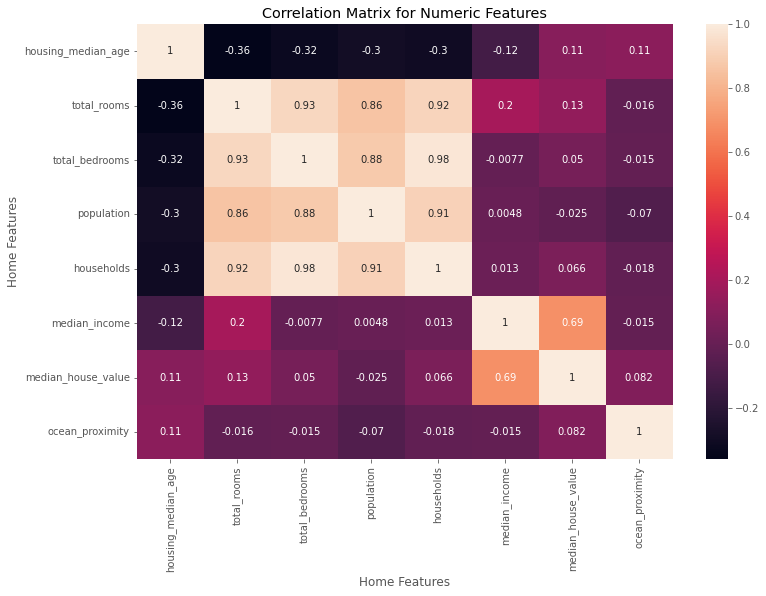

In [7]:
# Creating a heatmap with the new numerized data
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Home Features')
plt.ylabel('Home Features')
plt.show()

In [8]:
# Correlations in number
df_numerized.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000
